# Inner Representation

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
import pandas as pd

#%tensorflow_version 2.x
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt

import random

In [3]:
# !wget https://storage.googleapis.com/nicksdemobucket/banknotes.csv

In [7]:
df = pd.read_csv('./Banknote_Authentication.csv')
X = scale(df.drop('class', axis=1).values)
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


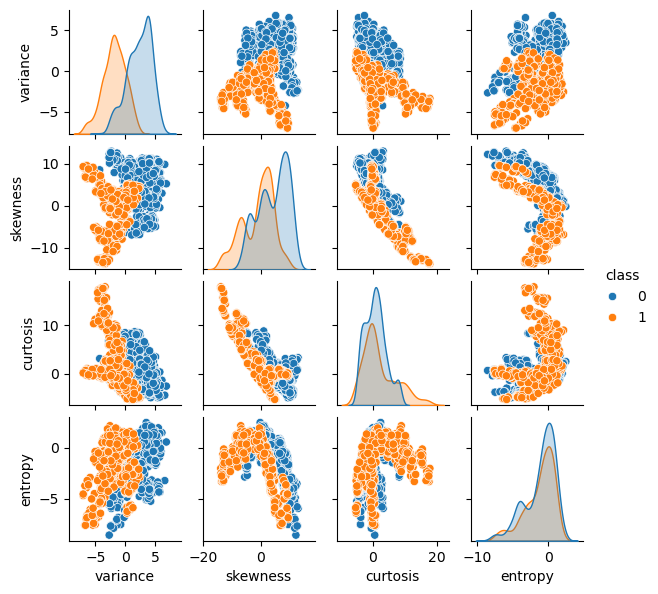

In [17]:
import seaborn as sns

sns.pairplot(df, hue='class', height=1.5, aspect=1)

In [19]:
random.seed(9001)

K.clear_session()

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.4938 - val_accuracy: 0.9479 - val_loss: 0.3343
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9303 - loss: 0.3033 - val_accuracy: 0.9514 - val_loss: 0.1978
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9561 - loss: 0.1630 - val_accuracy: 0.9722 - val_loss: 0.1194
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9692 - loss: 0.1129 - val_accuracy: 0.9792 - val_loss: 0.0785
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9634 - loss: 0.0793 - val_accuracy: 0.9826 - val_loss: 0.0562
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9674 - loss: 0.0621 - val_accuracy: 0.9826 - val_loss: 0.0464
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9809 - loss: 0.0513 - val_accuracy: 0.9826 - val_loss: 0.0414
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9783 - loss: 0.0471 - val_accuracy: 0.98

In [21]:
result = model.evaluate(X_test, y_test)
result

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9896 - loss: 0.0312


[0.02955247275531292, 0.987864077091217]

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (116.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15 (64.00 B)

In [57]:
model.layers

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [66]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Type: {layer.__class__.__name__}")


Layer 0: dense, Type: Dense
Layer 1: dense_1, Type: Dense


In [96]:
inp = model.inputs  # model.layers[0].input 으로 하니깐 형식이 안 맞는다고 predict시 경고메세지 나옴.
out = model.layers[0].output

In [98]:
inp

[<KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor>]

In [100]:
out

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [102]:
headless_model = keras.Model(inp, out) #headless_model이란 최종출력층을 제거한 모델
# 마지막 sigmoid 출력층(=head)은 빠짐 → 분류 결과 대신 중간 특징 벡터(feature representation) 를 얻을 수 있음.
# 용도
# 1. Feature Extraction (특징 추출)
#    - 훈련된 모델에서 출력층은 제거하고, 중간층에서 나온 벡터를 다른 모델이나 분석에 활용.
# 2. Transfer Learning
#    - 기존 모델에서 head를 잘라내고, 새로운 head (출력층)를 붙여서 다른 작업에 사용.
# 3. 시각화
#    - 중간층의 출력을 시각화해서 모델이 어떤 특징을 보고 있는지 분석.

In [104]:
inner_rep = headless_model.predict([X_test])
inner_rep

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.        , 2.542124  ],
       [0.7452229 , 1.4639125 ],
       [0.5317634 , 1.6974859 ],
       [0.        , 2.7646627 ],
       [0.        , 2.6974514 ],
       [0.        , 2.723772  ],
       [0.        , 2.2538862 ],
       [0.        , 3.1667113 ],
       [0.        , 2.677814  ],
       [0.        , 2.4711542 ],
       [1.8473518 , 1.1272206 ],
       [2.7954354 , 0.3967886 ],
       [0.        , 2.2391238 ],
       [2.3275719 , 0.52799416],
       [0.        , 1.7000337 ],
       [1.8837433 , 1.3885257 ],
       [2.2987595 , 0.3528924 ],
       [2.3523777 , 0.31338668],
       [1.6984375 , 0.43385875],
       [1.615994  , 0.67769426],
       [0.        , 2.862105  ],
       [0.        , 2.5481317 ],
       [1.7870457 , 0.6120616 ],
       [0.        , 3.081717  ],
       [3.1273777 , 0.        ],
       [0.        , 2.966676  ],
       [0.        , 3.2239022 ],
       [2.444357  , 0.40937722],
       [0.        , 4.1601195 ],
       [0.        , 3.725864  ],
       [3.

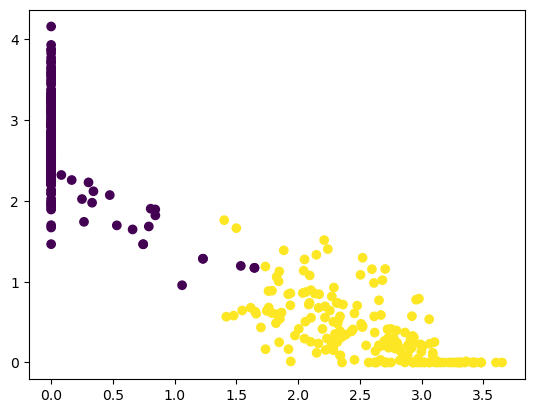

In [106]:
plt.scatter(inner_rep[:, 0], inner_rep[:, 1], c=y_test)

# Over Time...

In [110]:
random.seed(1990)
K.clear_session()

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8136 - loss: 0.4204
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9412 - loss: 0.1757
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9770 - loss: 0.0891
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9869 - loss: 0.0575
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9869 - loss: 0.0398
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9900 - loss: 0.0315
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9985 - loss: 0.0247
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9874 - loss: 0.0221
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 1.0000 - loss: 0.0223
13/13

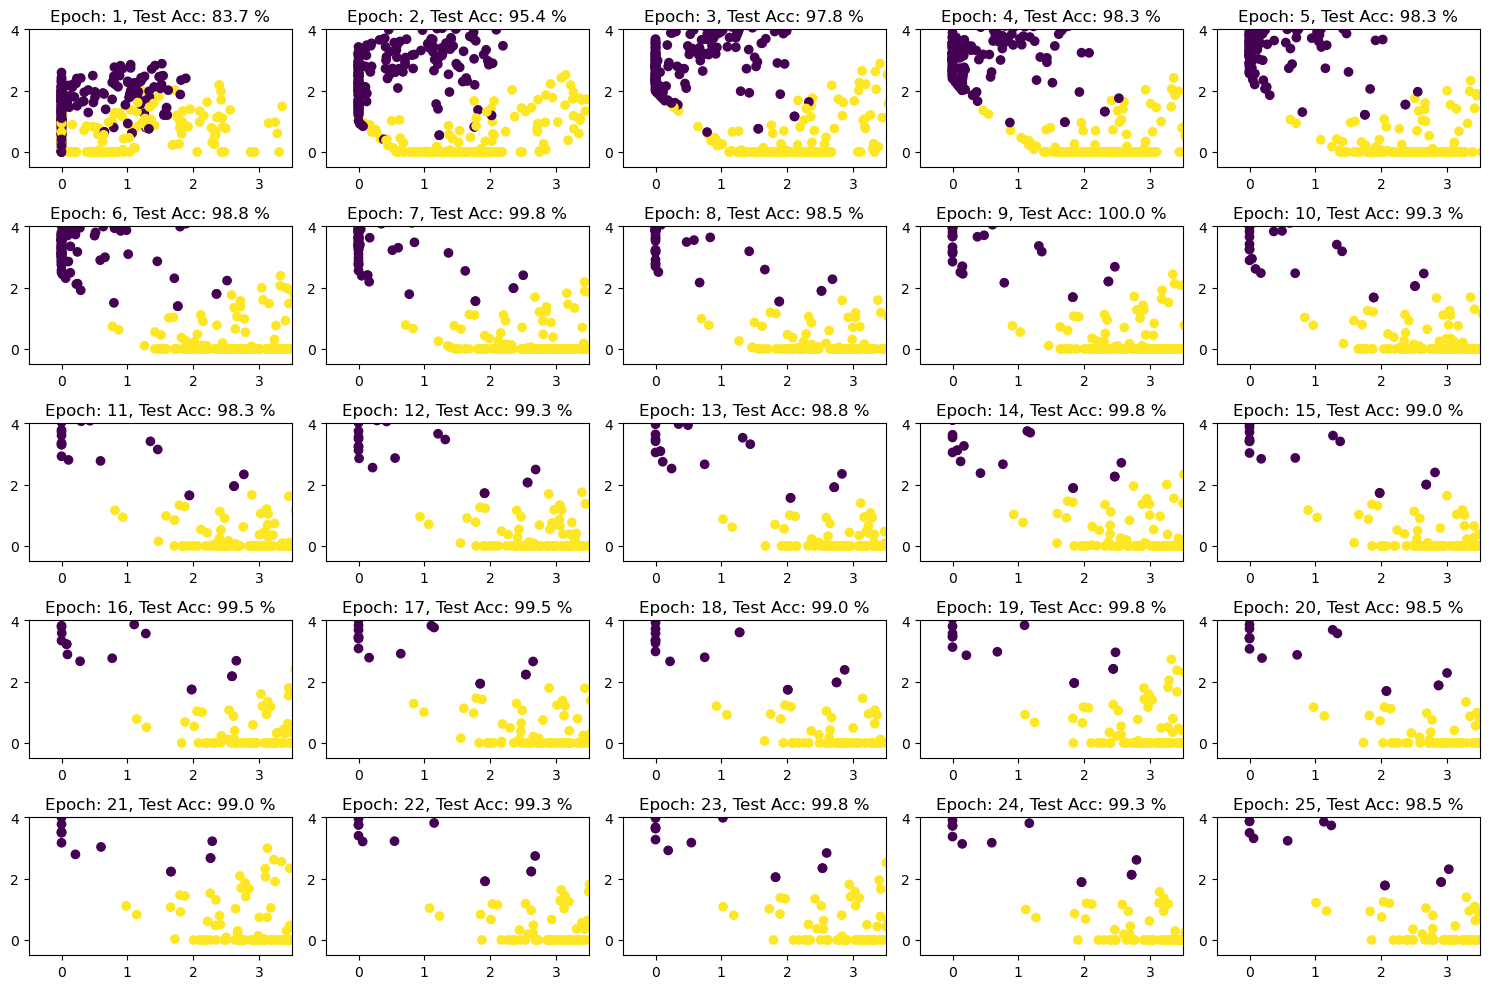

In [118]:
from tensorflow.keras.models import Model
inp = model.inputs
out = model.layers[1].output
features_function = Model(inputs=inp, outputs=out)
# features_function = K.function([inp], [out]) <- 왜 필요한 코드인 모르겠지만 에러발생해 위와 같이 바꿈.

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]

    headless_model = keras.Model(inp, out)
    inner_rep = headless_model.predict([X_test])
    plt.scatter(inner_rep[:, 0], inner_rep[:, 1], c=y_test)
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()